Name: __________________        Class: __________________     Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/Astronomy/main/APBanner.png" alt='A&P Logo'>
</center>

# Planetary Atmospheres

### AIM - Visualise the atmospheric composition of planets
Difficulty: Medium

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How do we know what the atmospheres of other planets contain?    
2) Do all the rocky planets have similar atmospheres?     
3) Do all planets have atmospheres?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Earth's Atmosphere](#EAtm)
* [Atmospheric Retention](#AtmRetention)
* [Challenges](#Challenges)
* [References](#References)

# Let's go: Visualising Atmospheres <a class="anchor" id="Start"></a>

You have been provided with some data about the chemical composition of planetary atmospheres (plus Pluto!). Let's load this data now and look at what we've been given:

In [1]:
# run me
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import Image

In [2]:
# run me
file = 'atmospheres.csv'
df = pd.read_csv(file)
df.head()

,Chemical,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,H2,22,0.0000,0.000060,0.000000,86.40000,88.000000,82.50000,80.00000,0.0
1,4He,0,0.0012,0.000524,0.000000,13.60000,12.000000,15.20000,19.00000,0.0
2,CH4,0,0.0000,0.000180,0.000015,0.00181,0.004700,2.30000,2.00000,2.5
3,NH3,0,0.0000,0.000000,0.000000,0.00060,0.000160,0.00001,0.00006,0.0
4,H2O,0,0.0002,0.000100,0.010000,0.05200,0.000002,0.00000,0.00000,0.0


For each planet and Pluto we have the abundance in percent of certain chemicals, the first of which is molecular Hydrogen. The first part of this activity will focus on making comparisons between the planets with two types of plots. The first plot we will make is a bar chart showing the abundance of one chemical in the atmospheres of all the planets and Pluto. The second will show the full composition for just one planet as a stacked bar chart. 

Let's start with the first plot. We need to extract the row of the dataframe for the chemical we want to look at.
<div class="alert alert-block alert-success">
Complete the code block below to extract data for water or ```'H2O'``` as it's stored in the csv:
    </div>

In [3]:
chem_name = 'H2O'
# Your code here:
chem = df.loc[df['Chemical'] == chem_name].values[0]
print(chem)

['H2O' 0 0.0002 0.0001 0.01 0.052000000000000005 2e-06 0.0 0.0 0.0]


Excellent! Now we have an array of values corresponding to each planet (we just need to ignore the first entry which is the chemicals name). 
<div class="alert alert-block alert-success">
Use the next code block to get the values out of the array but not the name:
    </div>

In [4]:
# Your code here:
vals = chem[1:]
vals

array([0, 0.0002, 0.0001, 0.01, 0.052000000000000005, 2e-06, 0.0, 0.0,
       0.0], dtype=object)

Before we go any further with the plotting we need to sort out the name. If we use the string from the csv as the name it will appear as ```H2O``` on our plot. We know that it should be formatted like this: $H_{2}O$.

We can achieve this by using Matplotlibs built in $\LaTeX$ functionality. $\LaTeX$ is a powerful typesetting tool used my most scientists to create their publications. Using $\LaTeX$ we can format our name so that Matplotlib displays it correctly with subscript and superscript.

To use $\LaTeX$ in Matplotlib all we have to is enter maths mode inside a string we want Matpltolib to add to our figure. 

This is how we would get $H_{2}O$ in our string:

```'$H_{2}O$'```

The ```$``` sign starts the maths mode and closes it. The underscore signifies we want a subscript (```^``` will give you superscript) and the text we want in the sub/superscript is within the curly brackets.

<div class="alert alert-block alert-success">
We are going to define a function below to take our csv string and turn it into a string like above so Matplotlib renders it using $\LaTeX$. Using the hints complete the code block below and test it on our string:
    </div>

In [5]:
# Fill in the blanks in this function
def chem_names(name):
    '''
    Takes a chemical name and returns it as LaTex/mathsmode string
    For labels in matplotlib
    '''
    # split the name string into individual characters using the list() function
    chars = list(name)
    # start the pretty_name variable with the $ sign for mathsmode
    pretty_name = '$'
    # iterate over each character in the name
    for i in range(len(chars)):
        # if it's the first character and a digit you'll need superscript
        if chars[i].isdigit() and i==0:
            pretty_name += '^{'+chars[i]+'}'
        # if the character is a letter just add it to pretty_name
        elif chars[i].isalpha():
            pretty_name += chars[i]
        # otherwise we will need to subscript the number
        else:
            pretty_name += '_{'+chars[i]+'}'
    # close the mathsmode with another $
    pretty_name += '$'
    return pretty_name

# Don't change this
name = chem_names(chem_name)
name

'$H_{2}O$'

Notice it now returns a string which Matplotlib will interpret with $\LaTeX$ and maths mode. Maths mode is very useful when you need mathematical symbols or to write equations and have them on your plot, or in your title and axis labels.

Ok now let's get back to plotting. We need a list of planet names (+Pluto) so Matplotlib knows which planet the values in our ```vals``` variable are referring to.
<div class="alert alert-block alert-success">
Either type out the list of planet names below or get them from the header of the csv:
    </div>

In [6]:
# Your code here:
planets = list(df)[1:]
planets

['Mercury',
 'Venus',
 'Earth',
 'Mars',
 'Jupiter',
 'Saturn',
 'Uranus',
 'Neptune',
 'Pluto']

<div class="alert alert-block alert-success">Now you have the planet names, complete the following code block and make your first plot:</div>

Text(0, 0.5, '$\\%$ of $H_{2}O$ in the atmosphere')

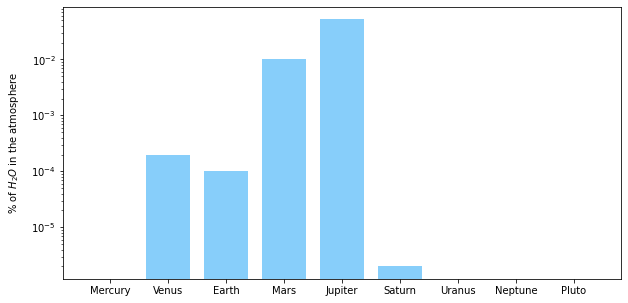

In [7]:
fig = plt.figure(num=1, figsize=(10, 5))
ax = plt.subplot(111)

# fill in the ax.bar() function - make the width=0.75 and choose any color
# Your code here:
ax.bar(planets, vals, width=0.75, color='lightskyblue')

# set the y axis to use a log scale
# Your code here:
ax.set_yscale('log')

# This will set the y label for you. It uses maths mode!
# the % is a special character so it is 'escaped' with a \
# this means it will print the percentage symbol
# the r, for raw string, lets us include characters like ' and " which normally would start/end a string 
ax.set_ylabel(r'$\%$ of '+name+' in the atmosphere', labelpad=10)

<div class="alert alert-block alert-info"><p>Are there any suprises? Notice how there appears to be a region from Venus to Saturn where water is found in atmospheres. Why is that?</p>
    
<p>Try making a similar plot for Hydrogen (<strong>'H2'</strong> in the csv file). Which planets have large amounts of $H_2$ in their atmospheres? Are they the planets you expected? You might also like to plot a graph for the greenhouse gas $CO_2$!</p>
</div>
Just remember that these plots use a log scale on the y axis which makes Venus and Earth in this plot look like they have lots of water vapour in their atmospheres. In reality the value for Jupiter is 520 ppm (parts per million = 0.00001 %) and the Earth has only 1 ppm. As a challenge it might be worth adding text annotations to the bars with the actual values like in the image you can load below.

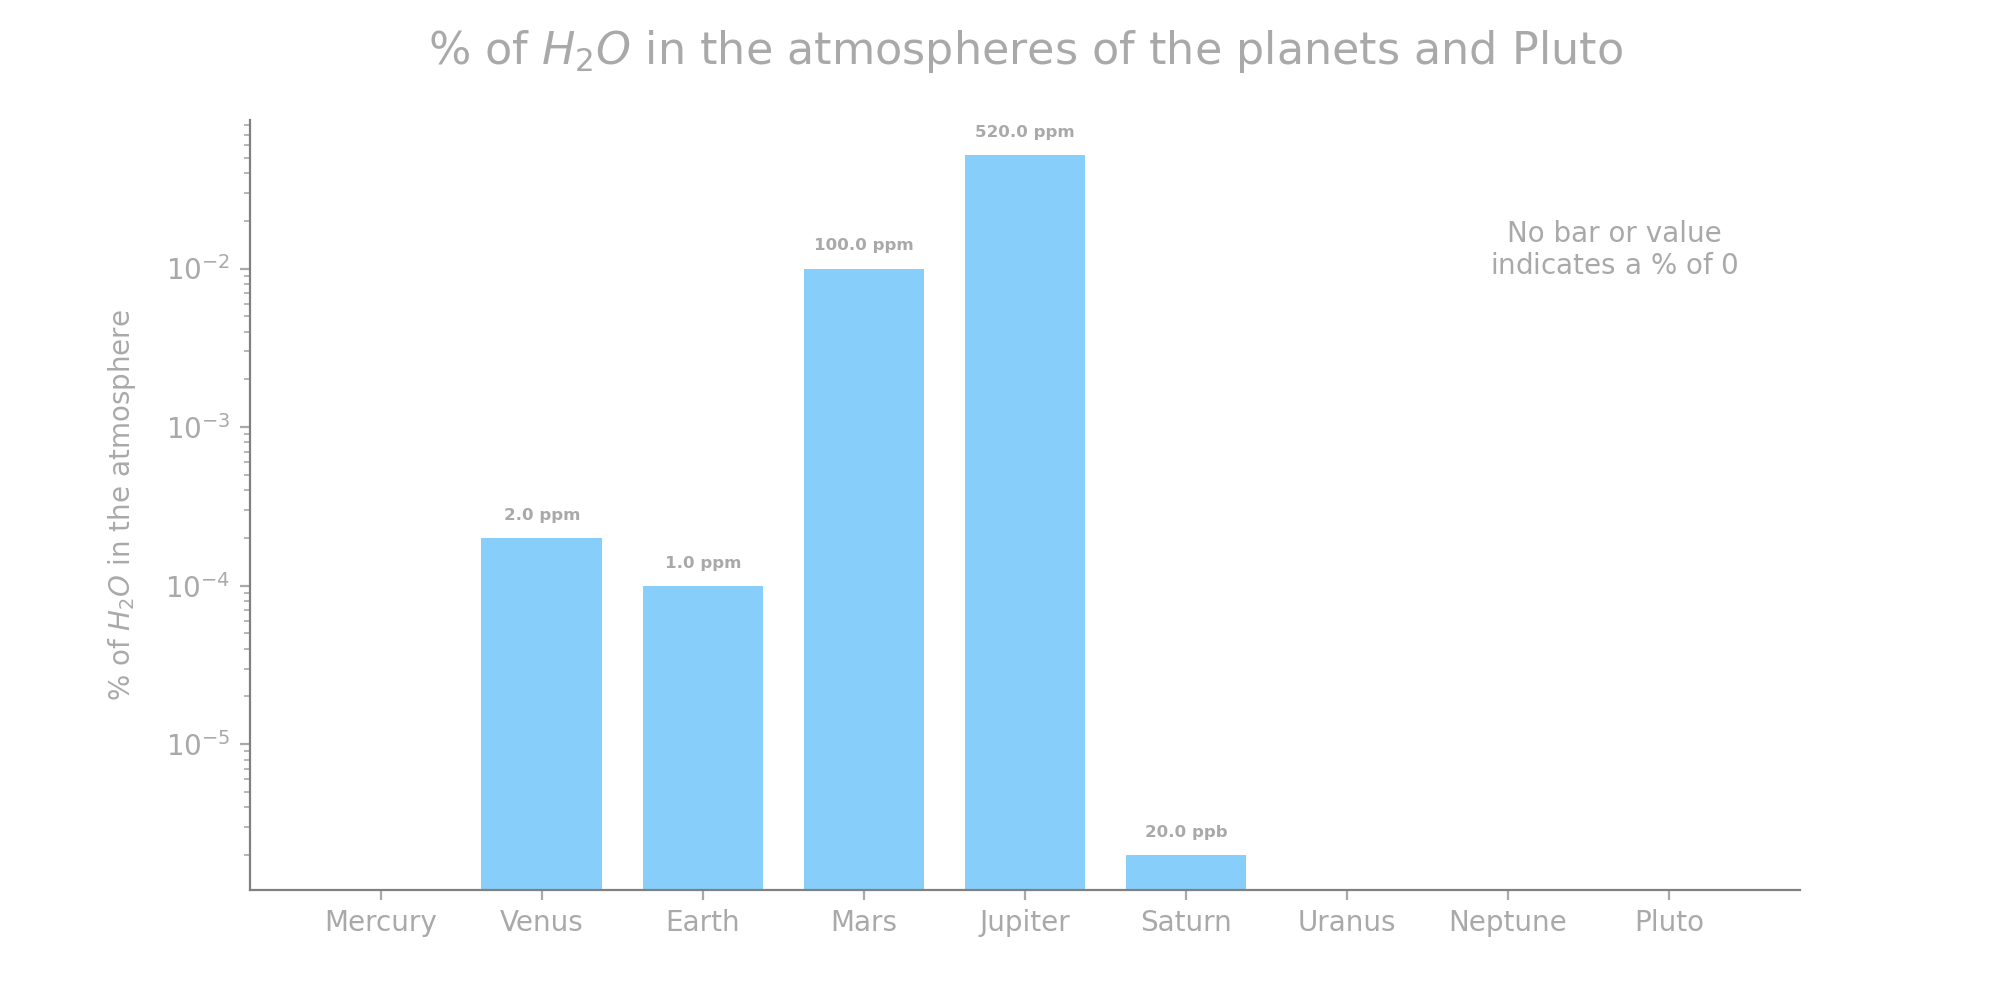

In [8]:
# run me
Image('./figures/chem_H2O_atm_planet_comp.png')

When you're ready you can begin to make the second plot. This is a stacked bar chart; a bar chart where the bars are on top of each other. <a class="anchor" id="EAtm"></a>

Let's look at the atmosphere of the Earth. 
<div class="alert alert-block alert-success">
Complete the code block below to select the values for the Earth where the percentage is greater than 0.01 (so we don't clutter our plot with trace gases):</div>

In [9]:
planet_name = 'Earth'

# use .loc to get a new dataframe where the df['Earth'] values are greater than 0.01
# sort these values so the highest number is first in the dataframe using .sort_values
# if you're stuck fon't forget to consult the pandas documentation
# Your code here:
earth = df.loc[df[planet_name] > 0.01].sort_values(by=planet_name, ascending=False)

earth

,Chemical,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
24,N2,0,3.500,78.000,1.90,0.000000,0.000000e+00,0.000000e+00,0.0,97.0
27,O2,42,0.000,20.946,0.15,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
23,Ar,0,0.007,0.934,1.90,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
15,CO2,0,96.500,0.040,96.00,0.000003,3.000000e-08,4.000000e-09,0.0,0.0


We still have all the other planets present but we can ignore them. Look at the Earth column. We now have four components in order of decreasing abundance. 
<div class="alert alert-block alert-success">
Extract the % values for the Earth (from the Earth column) and the chemical names so we can plot them:</div>

In [10]:
# extract the % values to earthVals and the Chemical names to earthChems
# Your code here:
earthVals = earth[planet_name].values
print(earthVals)

earthChems = earth['Chemical'].values
print(earthChems)

[7.8000e+01 2.0946e+01 9.3400e-01 4.0000e-02]
['N2' 'O2' 'Ar' 'CO2']


<div class="alert alert-block alert-success">Now for each string in the <strong>earthChems</strong> array pass it to the <strong>chem_names()</strong> function so that they're ready for Matplotlib to render with $\LaTeX$:</div>

In [11]:
# Your code here:
earthChemNames = [chem_names(name) for name in earthChems]
earthChemNames

['$N_{2}$', '$O_{2}$', '$Ar$', '$CO_{2}$']

Great. All that's left is to:
<div class="alert alert-block alert-success">
Complete the following code block to make your stacked bar chart:</div>

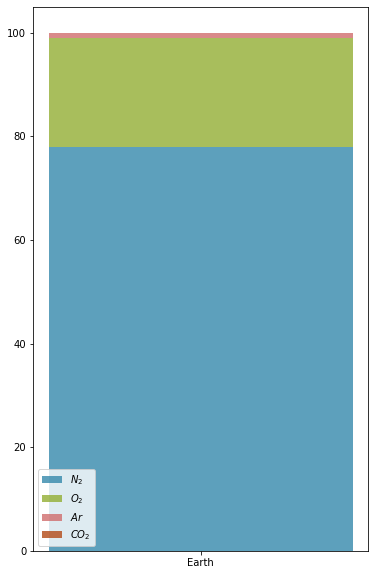

In [12]:
# use this dictionary to give each chemical a unique color
colors = {
    'N2': '#3489AC',
    'O2': '#92AE33',
    'Ar': '#D06D6D',
    'CO2': '#B34A17',
    'Na': '#979695',
    'H2': '#4462AB',
    '4He': '#D7880A',
    'CH4': '#D1BB3F',
    'SO2': 'maroon',
    'GeH4': 'sandybrown',
    'HD': 'mediumseagreen',
    'H2O': 'lightskyblue',
    'CO': 'peru',
    'Other': '#B3947E'
}

# setup the figure and axes
fig = plt.figure(num=1, figsize=(6,10))
ax = plt.subplot(111)

# we need to loop over all the chemicals plotting one bar at a time, stacking it on the last one
for i in range(len(earth)):
    # to stack we need the y value (we have called it bot) where the previous bar ends
    # for the first bar the y value is just 0
    if i==0:
        bot = 0
    # otherwise we need the sum of the earthVals array up to this chemical at index i (but don't include it in the sum)
    else:
        bot = np.sum(earthVals[:i])
    thisbar = ax.bar(['Earth'], [earthVals[i]], 1, label=earthChemNames[i], bottom=bot, alpha=0.8, color=colors[earthChems[i]])  

ax.legend()

The amount of $CO_2$ is so small it is very hard to see on our plot! Try and tidy up the plot. Here are a few suggestions:

- Remove the top and right hand side spines (axes have 4 spines top, bottom, left, and right to form the black bounding box you see!)   
- Move the legend to the right of the plot so it's not on the bar chart   
- Remove the frame on the legend  
- Reverse the legend entries so that they're in the same order as the bars appear  
- Annotate the chart with the actual values  

Doing even one of these will make your chart more readable.

<div class="alert alert-block alert-info">Compare the chart with no improvements to the following image you can load. What about it makes it more readable?</div>

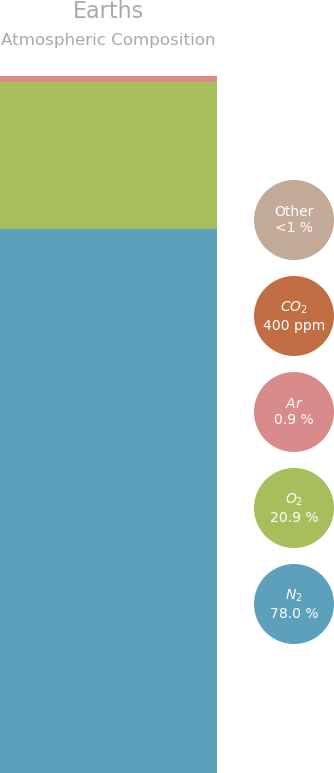

In [13]:
# run me
Image('./figures/Earths_Atm_comp.png')

Try making some of these stacked bar chart plots for the other planets. Are there any planets with similar atmospheres? Any odd ones out?

How do the compositions of the gas giants compare to that of the sun? Often abundace values for these planets are given relative to the sun (or the composition of the solar nebula from which the solar system formed). If you're interested take a look at this book chapter on [The Composition of the Atmosphere of Jupiter](https://lasp.colorado.edu/home/mop/files/2015/08/jupiter_ch4-1.pdf).

## Atmospheric Retention <a class="anchor" id="AtmRetention"></a>

The planets are slowly loosing their atmospheres!!!!! Oh no! This actually happens very very slowly. Atmospheres can be blown away by the solar wind, removed by interactions with charged particles, or ejected in a collision (see Peter Gallagher's Planetary Atmospheres lecture pdf [here](https://www.tcd.ie/Physics/people/Peter.Gallagher/lectures/PY4A03/pdfs/PY4A03_lecture12n13_amospheres.ppt.pdf) for more ways a planet can loose its atmosphere and a mathematical description of the loss rate).

The gases in our atmosphere have a temperature which is associated to the motion of each gas particle/molecule. The hotter a gas the faster it moves! The thermal energy of a gas particle/molecule is given by

$$E_{thermal} = \frac{3}{2}kT$$

where $T$ is the temperature in Kelvin and $k$ is the Botlzman constant. If we remember the equation for kinetic energy:

$$E_{kinetic} = \frac{1}{2}mv_{avg}^2$$

then we can equate $E_{kinetic}$ and $E_{thermal}$ to get an equation linking temperature and the average speed of a gas particle. Re-arrange a bit and we end up with:

$$v_{avg} = \left(\frac{3kT}{m}\right)^{0.5}$$

How does this link to atmospheric retention? If the particles are moving really fast they could be able to escape the gravitational pull of the planet.

If the average velocity of a particle is greater than one sixth the escape velocity of the planet then it can escape into space. The escape velocity is the velocity needed to escape the gravitational influence of the planet/object. On Earth this value is around $11.2\ km/s$!

Let's consider the Earth and see whether the gases $H_2$ and $H_2O$ can escape.

<div class="alert alert-block alert-success">Complete the code block below to work out $v_{avg}$ for both gases:</div>

In [14]:
# masses of a gas particle in u (notice the H is timesed by 2 since it's diatomic)
u = 1.6605390666050*10**(-27) # kg
m1H2 = 1.007825*2*u # kg
mH2O = (18/10**3)/(6.022137*10**(23)) # kg (g/mol / g/kg / Na) - Na is avogadro's number

T = 1000 # K - the temp at the top of the Earth's exosphere
k = 1.38064852*10**(-23) # m^2kgs^-2K-1

# calculate v avg for both gases below and convert to km/s
# Your code here:
vH = (3*k*T/m1H2)**.5 / 1000
vH2O = (3*k*T/mH2O)**.5 / 1000

print('One sixth of Earths escape velocity = {:.1f} km/s'.format(11.2/6))
print('v avg for Hydrogen = {:.1f} km/s'.format(vH))
print('v avg for Water vapour = {:.1f} km/s'.format(vH2O))

One sixth of Earths escape velocity = 1.9 km/s
v avg for Hydrogen = 3.5 km/s
v avg for Water vapour = 1.2 km/s


Notice the average velocity for Hydrogen is greater than one sixth of the Earth's escape velocity so any Hydrogen gas on the Earth will escape into space. On the other hand water vapour has a lower velocity so it won't escape. Now load the image below:

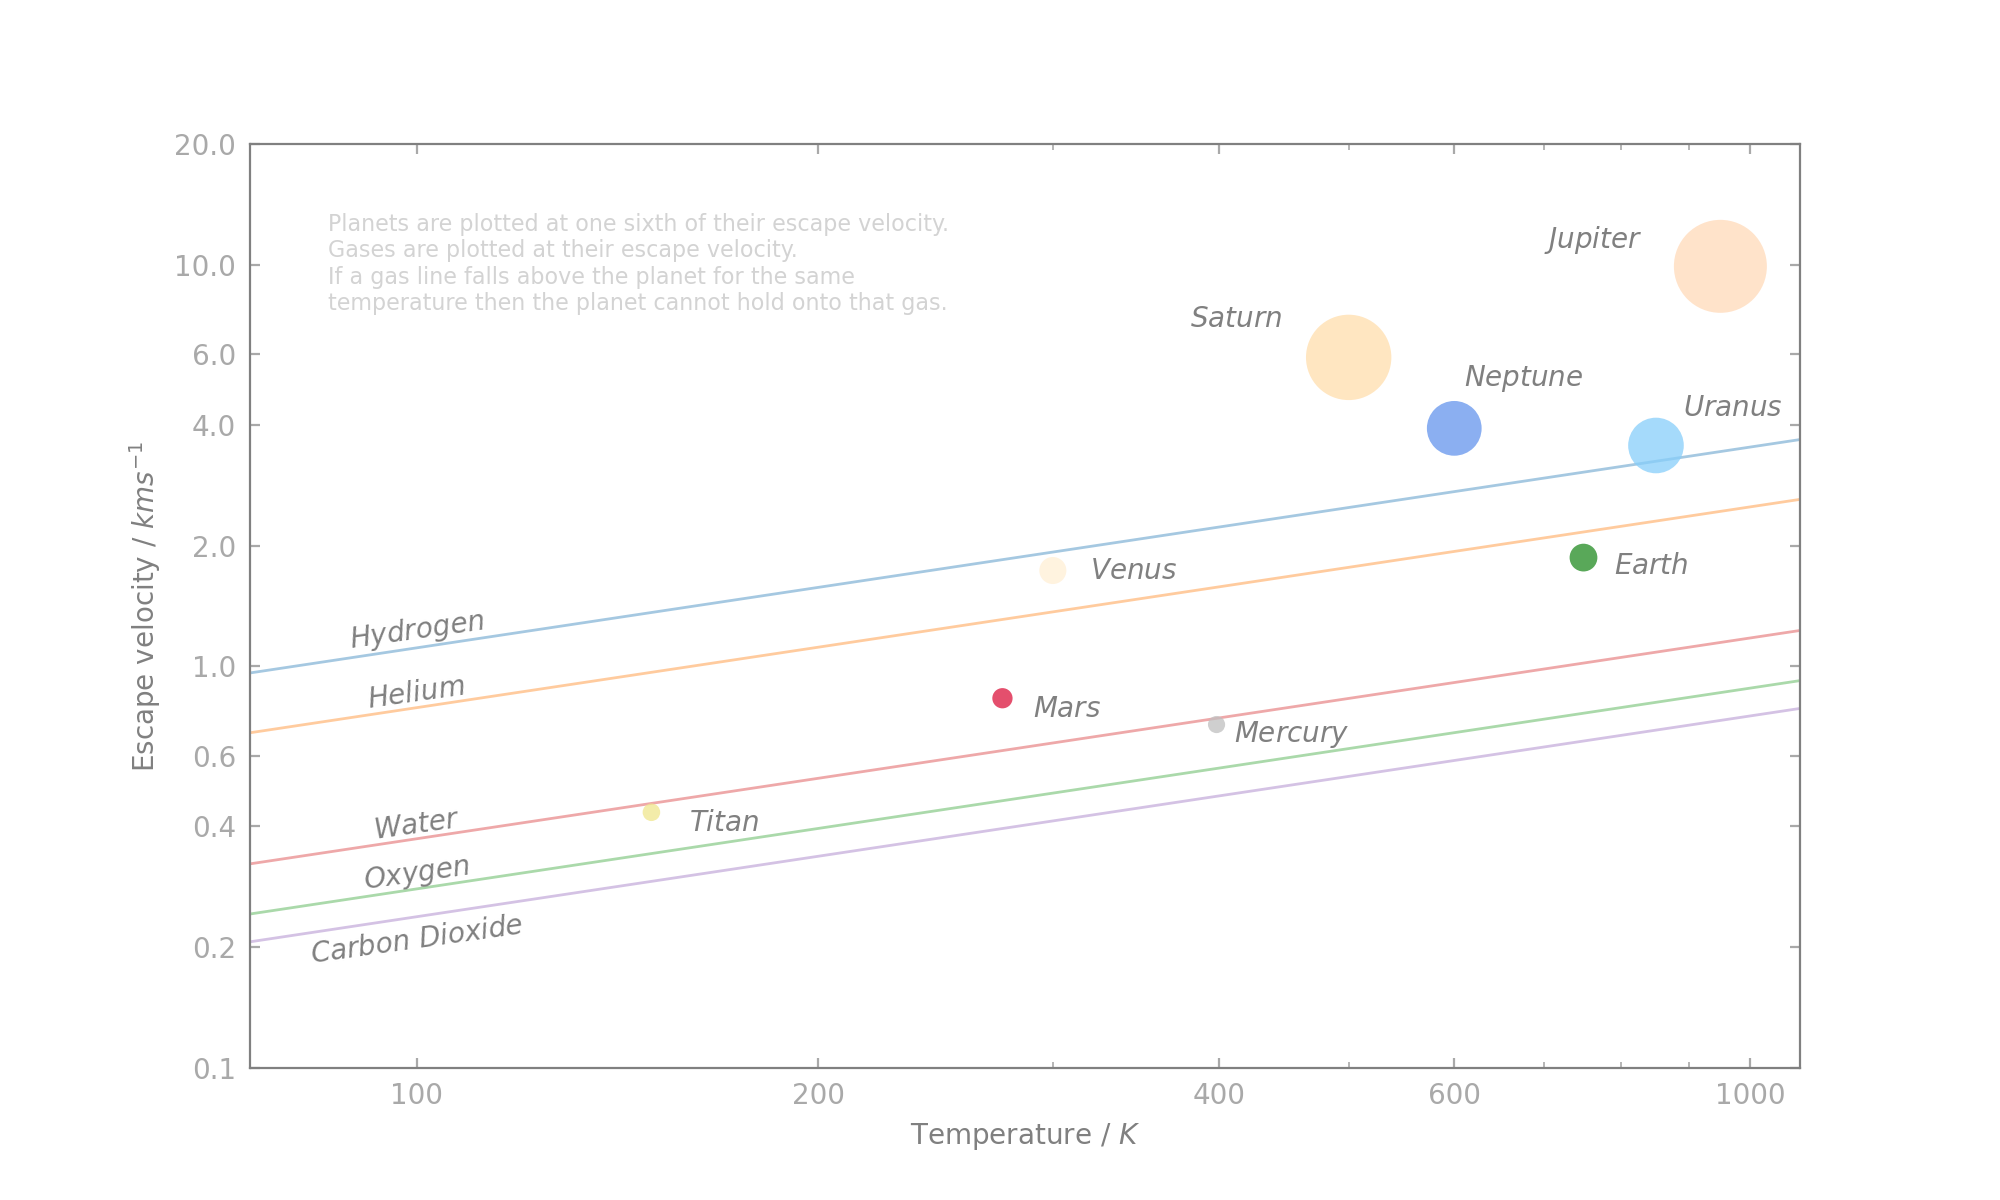

In [15]:
# run me
Image('./figures/atm_retention.png')

This figure shows five gases and whether the planets can hold onto them or whether they will escape. If a gas line lies above the planet for the same temperature then it will escape into space. Notice all the gas giants are large enough to hold onto the lightest gas Hydrogen.

Be sure to check out [this page](https://www.vanderbilt.edu/AnS/physics/astrocourses/ast201/esc_vel_atmospheres.html) by David A. Weintraub for more detail on retention and capture of gas when the planets were forming.

## How do we know what other planets atmospheres are like?

In some cases we have been there! Either in person, the Moon, or we sent rovers, Mars and Venus, and loads of satellites! These satellites can measure particles from the atmosphere as they are lost to space, look at the absorption and emission spectra of the atmospheres (some Earth based telescopes can do this by looking at how sunlight is absorbed by the planets atmosphere), or in the case of the Galileo spacecraft send down a probe into the atmosphere of the planet!!! (see [here](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/98JE01766) for more on the Galileo probe)

# Challenges <a class="anchor" id="Challenges"></a>

1) Tidy up your plots to make them more readable.  
2) Find data for the Galilean moons and perhaps also Titan (Saturn's moon). What are their atmospheres made of?  
3) Calculate the lightest gas particle which can remain in Mercurys atmosphere.

# References <a class="anchor" id="References"></a>

Downloaded references are now on my Google Drive [here](https://drive.google.com/drive/folders/1Tw07bSwSy3jiT3fWibMwiLyCP3xbZCgN?usp=sharing) due to their size.

Data from:  
Rauf KM et al. (2015) Comparing the Atmospheric Compositions of All Planets and Giant Moons in Solar System [https://www.longdom.org/open-access/comparing-the-atmospheric-compositions-of-all-planets-and-giant-moons-in-solar-system-2332-2519-1000136.pdf](https://www.longdom.org/open-access/comparing-the-atmospheric-compositions-of-all-planets-and-giant-moons-in-solar-system-2332-2519-1000136.pdf)  

Exobase data from:  
A. Garcia Munoz et al - Upper Atmospheres and Ionospheres of Planets and Satellites [https://arxiv.org/ftp/arxiv/papers/1712/1712.02994.pdf](https://arxiv.org/ftp/arxiv/papers/1712/1712.02994.pdf)

Galileo Probe:  
Alvin Seiff et al. (1998) Thermal structure of Jupiter's atmosphere near the edge of a 5‐μm hot spot in the north equatorial belt [https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/98JE01766](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/98JE01766)

Further Reading:  
The Composition of the Atmosphere of Jupiter [https://lasp.colorado.edu/home/mop/files/2015/08/jupiter_ch4-1.pdf](https://lasp.colorado.edu/home/mop/files/2015/08/jupiter_ch4-1.pdf)  
David A. Weintraub - Escape Velocity [https://www.vanderbilt.edu/AnS/physics/astrocourses/ast201/esc_vel_atmospheres.html](https://www.vanderbilt.edu/AnS/physics/astrocourses/ast201/esc_vel_atmospheres.html)  
Peter Gallagher - Planetary Atmospheres [https://www.tcd.ie/Physics/people/Peter.Gallagher/lectures/PY4A03/pdfs/PY4A03_lecture12n13_amospheres.ppt.pdf](https://www.tcd.ie/Physics/people/Peter.Gallagher/lectures/PY4A03/pdfs/PY4A03_lecture12n13_amospheres.ppt.pdf)  
A. J. Coates - Atmospheric escape [https://sci.esa.int/documents/33745/35957/1567258799920-Weihai-093-Coates-escape.pdf](https://sci.esa.int/documents/33745/35957/1567258799920-Weihai-093-Coates-escape.pdf)  
Catling and Zahnle (2009) The escape of planetary atmospheres [https://geosci.uchicago.edu/~kite/doc/Catling2009.pdf](https://geosci.uchicago.edu/~kite/doc/Catling2009.pdf)  
Nick Strobel (2020) Escape Velcoity [http://www.astronomynotes.com/solarsys/s3.htm](http://www.astronomynotes.com/solarsys/s3.htm)

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/astroDimitrios/Astronomy 